In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

Load Boston data from scikit-learn datasets library

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

This dataset is retreived as a dictionary object with a number of key/value pairs that hold the data and information about the dataset. Here are the keys in the dictionary.
- data (use this key to retrieve the dataset)
- target (use this key to retrieve the target feature (dependent balue) of this dataset)
- feature_names (use the key to retrieve all the features (column headings) names)
- DESCR (use this key to get a description of all the features in the dataset)
- filename (use this feature to retrive the filename of this dataset)

these keys can be accessed by issuing the command boston_dataset.keys(). The values can be retrieved by the following key names

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

A linear regression model might be appropriate. We explore the independent and dependent variables and their suitability for a MLR model. 

mdev is the target variable (dependent variable) of our dataset.

In [4]:
mdev = boston_dataset.target

we get features from this dataset

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Let us add mdev to the pandas dataset. This will give us the full dataset as a dataframe. 

In [7]:
boston['MEDV'] = mdev

In [8]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


2. Discover the data

look at the data. are there any null values

In [9]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

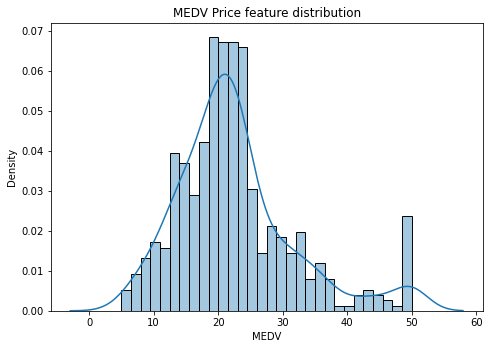

In [12]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])

sns.histplot(data=boston['MEDV'], bins=30, stat="density", ax=ax, alpha=0.4, kde=True, kde_kws={"cut": 3})
ax.set_title("MEDV Price feature distribution")
plt.show()

<AxesSubplot:>

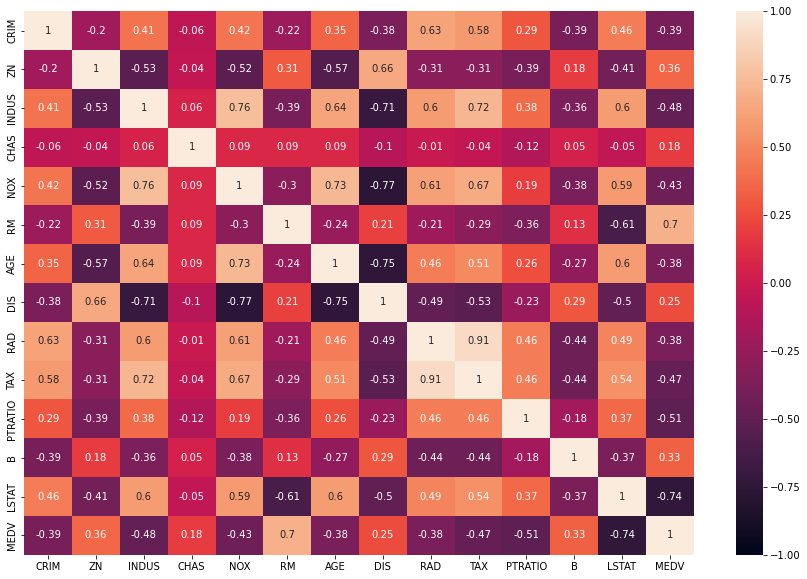

In [13]:
plt.figure(figsize=(15, 10))
correlation_matrix = boston.corr() .round(2)
#annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1)

In [16]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0.5, 1.0, 'RM')

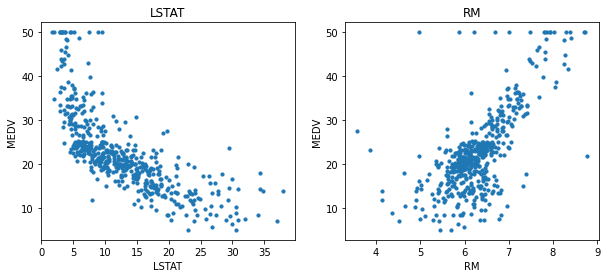

In [15]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axs[0] .scatter(boston['LSTAT'], boston['MEDV'], s=10)
axs[0] .set(xlabel='LSTAT', ylabel='MEDV')
axs[0] .set_title('LSTAT')

axs[1] .scatter(boston['RM'], boston['MEDV'], s=10)
axs[1] .set(xlabel='RM', ylabel='MEDV')
axs[1] .set_title('RM')

we will check for outliers with histograms and boxplots

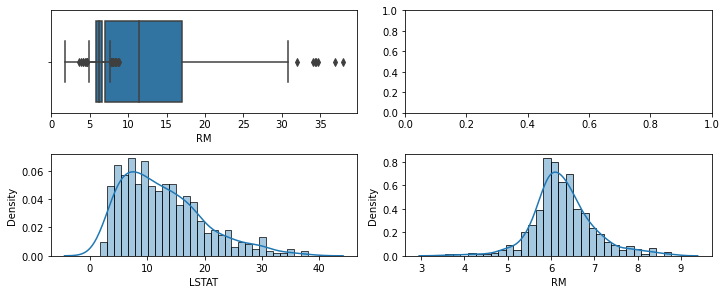

In [21]:
fix,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,4))
plt.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=.9)

fig.suptitle('Comparing distribution shapes of LSTAT and RM features')

sns.boxplot(ax=axs[0,0],x=boston['LSTAT'])
ax.set_title('LSTAT feature distribution')

sns.boxplot(ax=axs[0,0],x=boston['RM'])
ax.set_title("RM feature distribution")
sns.histplot(ax=axs[1,0],data=boston['LSTAT'],bins=30, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
ax.set_title("LSTAT feature distribution")

sns.histplot(ax=axs[1,1],data=boston['RM'],bins=30, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
ax.set_title("RM Price feature distribution")

plt.show()

Check for multicolinarity

Prepare the dataframes to build MLR model

In [23]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#use dmatrices to create the X dataframe from the independent variables 'LSTAT' and 'RM'
#use dmatrices to create the Y datadrame from the dependent variable 'MEDV'

y, X = dmatrices('MEDV ~ LSTAT+RM', data=boston, return_type='dataframe')

#calculate VIF for each explanatory variable. This checks for Multicolinearity
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
#we drop row 0 as it is not used to measure different features
vif.drop(0)

,VIF,variable
1,1.60452,LSTAT
2,1.60452,RM


How to interpret VIF (Variance Inflation Factor) Values

The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:
    
- A calue for 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.
- A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
- A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable. 

All the values for our independent variables are between 1 and 5. We conclude that these variables are indeed independent. We can proceed to building our model. 

4. Model design

We will now design our model. We have our independent variables and our dependent variable. We have decided on a Linear Regression Model based on our observations we will treat MEDV as our dependent variable while we will use LSTAT and RM as our independent variables. These are now stored in two dataframes y for MEDV and X for the RM and LSTAT. 

Next we have to split out the data into training and test data for this we take the class test_train_split from the scikit-learn sklearn.model_selection. 

5. Model implementation

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 3)
(102, 3)
(404, 1)
(102, 1)


We run our model using the Linear regression class from sklearn.linear_model

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
#model evaluation for training set
y_train_predict = model.predict(X_train)
#model evaluation for testing set
y_test_predict = model.predict(X_test)

We can now plot our results

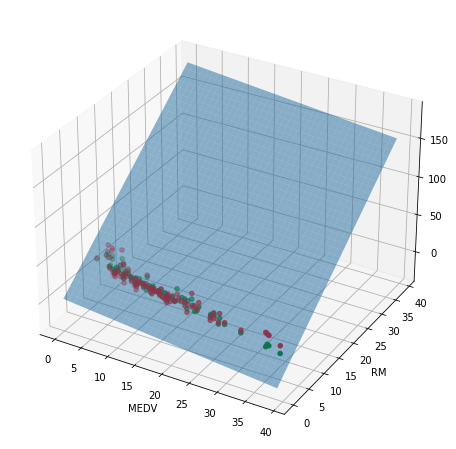

In [38]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(8,8))
#build the regression plain
xs = np.tile(np.arange(40),(40,1))
ys = np.tile(np.arange(40),(40,1)).T
zs = xs*model.coef_[0,1]+ys*model.coef_[0,2]+model.intercept_[0]

ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test['LSTAT'],X_test['RM'],y_test,c='r',marker='o')
ax.scatter(X_test['LSTAT'],X_test['RM'],y_test_predict,c='g',marker='o')
ax.plot_surface(xs,ys,zs,alpha=0.5)
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_xlabel('MEDV')

#rotate the axes and update
#for angle in range (0, 360):
#ax.view_init(30,angle)

plt.show()

6. Model validation

we also import the mean_squared_error class from sklearn.metricsso that we can test if our model works well.

Metrics

RMSE is measured as the average distance between the predicted values and the actual values of the dataset

R2 Score is measured as the proportion of the variation in the dependent variable that is predictable from the independent variable(s)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

#model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

print('R2 score is {}'.format(r2))

print("\n")

#model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954
